![MontecarloCirclePI.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/MontecarloCirclePI.png)

In [ ]:
import random as r
import matplotlib.pyplot as plt

Scatter plot :Matplotlib Scatter: Exercise-3 with Solution  -[w3resource.com](https://www.w3resource.com/graphics/matplotlib/scatter/matplotlib-scatter-exercise-3.php)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


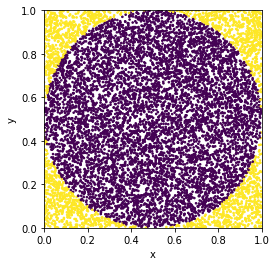

Pi approx: 3.138


In [ ]:
n=10000
count = 0
xlist=[]
ylist=[]
clist=[]
for i in range(n):
  x=r.random()
  y=r.random()
  c=1
  if ((x-0.5)**2+(y-0.5)**2 < 1/4):
    count = count +1
    c=0
  xlist.append(x)
  ylist.append(y)
  clist.append(c)
# Matplotlib Scatter: Exercise-3 with Solution https://www.w3resource.com/graphics/matplotlib/scatter/matplotlib-scatter-exercise-3.php
# How can I set the aspect ratio in matplotlib?: https://stackoverflow.com/questions/7965743/how-can-i-set-the-aspect-ratio-in-matplotlib
plt.figure()
plt.scatter( xlist, ylist,  c=clist,  s=2.5)
plt.axis([0.0, 1.0, 0.0, 1.0])
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal')
plt.show()
print("Pi approx:",4*count/n)

Monte Carlo method - [wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method)


<img src="https://upload.wikimedia.org/wikipedia/commons/8/84/Pi_30K.gif" alt="drawing" width="250"/>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


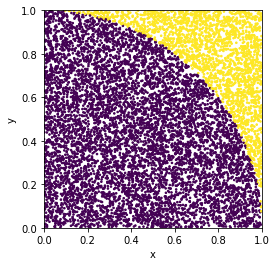

Pi approx: 3.1212


In [ ]:
n=10000
count = 0
xlist=[]
ylist=[]
clist=[]
for i in range(n):
  x=r.random()
  y=r.random()
  c=1
  if (x**2+y**2 < 1):
    count = count +1
    c=0
  xlist.append(x)
  ylist.append(y)
  clist.append(c)
plt.figure()
plt.scatter( xlist, ylist,  c=clist, s=2.5)
plt.axis([0.0, 1.0, 0.0, 1.0])
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal')
plt.show()
print("Pi approx:",4*count/n)

In [ ]:
n=100000000
count = 0
for i in range(n):
  x=r.random()
  y=r.random()
  if (x**2+y**2 < 1):
    count = count +1
print("Pi approx:",4*count/n)

Pi approx: 3.14157344


Quasi-Monte Carlo

Quasi-Monte Carlo has a rate of convergence close to O(1/N), whereas the rate for the Monte Carlo method is O(N^{−0.5}) - [wikipedia](https://en.wikipedia.org/wiki/Quasi-Monte_Carlo_method)

Halton’s low discrepency sequences -Monte Carlo sampling methods - [risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html)

In [ ]:
import numpy 
import math

In [ ]:
# adapted from https://mail.scipy.org/pipermail/scipy-user/2013-June/034744.html
def halton(dim: int, nbpts: int):
    h = numpy.full(nbpts * dim, numpy.nan)
    p = numpy.full(nbpts, numpy.nan)
    P = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]
    lognbpts = math.log(nbpts + 1)
    for i in range(dim):
        b = P[i]
        n = int(math.ceil(lognbpts / math.log(b)))
        for t in range(n):
            p[t] = pow(b, -(t + 1))

        for j in range(nbpts):
            d = j + 1
            sum_ = math.fmod(d, b) * p[0]
            for t in range(1, n):
                d = math.floor(d / b)
                sum_ += math.fmod(d, b) * p[t]

            h[j*dim + i] = sum_
    return h.reshape(nbpts, dim)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


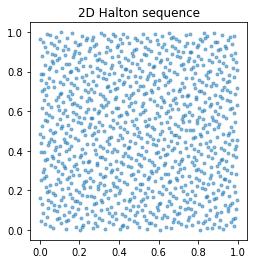

In [ ]:
N = 1000
seq = halton(2, N)
plt.title("2D Halton sequence")
# Note: we use "alpha=0.5" in the scatterplot so that the plotted points are semi-transparent
# (alpha-transparency of 0.5 out of 1), so that we can see when any points are superimposed.
plt.axes().set_aspect('equal')
plt.scatter(seq[:,0], seq[:,1], marker=".", alpha=0.5);


Pi approx: 3.1448


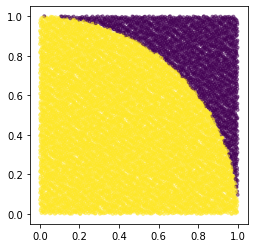

In [ ]:
N = 10000
seq = halton(2, N)
count = 0
c=[]
for p in seq:
  if (p[0]**2+p[1]**2 < 1):
    count = count +1
    c.append(1)
  else:
    c.append(0)
print("Pi approx:",4*count/float(N))
plt.axes().set_aspect('equal')
plt.scatter(seq[:,0], seq[:,1],  c=c,marker=".", alpha=0.5);


In [ ]:
N = 1000000
seq = halton(2, N)
count = 0
for p in seq:
  if (p[0]**2+p[1]**2 < 1):
    count = count +1
    c.append(1)
  else:
    c.append(0)
print("Pi approx:",4*count/float(N))

Pi approx: 3.141572
